In [1]:
# Compact elipticals and Galaxy density

In [2]:
## importation lol

In [1]:
from pylab import *
import numpy as np
import os as os
import astrocalcs as ac
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
%matplotlib notebook

Mass_to_Light_V = 2.0
M_Sun = 4.81

Spec_data_Set_1 = recfromcsv('All_non_error_SDSS_galaxies_with_mass_type_class_stemlord.csv', names=True, delimiter=',', unpack = True)
objid_Set_1,ra_Set_1,dec_Set_1,devrad_r_Set_1,fracdev_r_Set_1,exprad_r_Set_1,\
redshift_Set_1,modelmag_u_Set_1,modelmag_g_Set_1,modelmag_r_Set_1,modelmag_i_Set_1,\
modelmag_z_Set_1,petrorad_r_Set_1,petroR50_r_Set_1,theta_Set_1,effective50_radius_Set_1,\
Surface_area_logged_Set_1,veldisp_Set_1,vdisp_median1_Set_1,vdisp_median2_Set_1,\
Ports_passive_mass_Set_1,GranadaFSPS_mass_Set_1,WiscBC03_mass_Set_1,Wiscm11_mass_Set_1,\
Flux_OIII_5006_Set_1,Flux_Hb_4861_Set_1,Flux_NII_6583_Set_1,Flux_Ha_6562_Set_1,\
Flux_SII_6716_Set_1,Flux_SII_6730_Set_1,Flux_OI_6300_Set_1,snMedian_Set_1,bpt_Set_1,clean_Set_1,objtype,objclass = \
Spec_data_Set_1['objid'],Spec_data_Set_1['ra'],Spec_data_Set_1['dec'],\
Spec_data_Set_1['devrad_r'],Spec_data_Set_1['fracdev_r'],Spec_data_Set_1['exprad_r'],\
Spec_data_Set_1['redshift'],Spec_data_Set_1['modelmag_u'],Spec_data_Set_1['modelmag_g'],\
Spec_data_Set_1['modelmag_r'],Spec_data_Set_1['modelmag_i'],Spec_data_Set_1['modelmag_z'],\
Spec_data_Set_1['petrorad_r'],Spec_data_Set_1['petror50_r'],Spec_data_Set_1['theta'],\
Spec_data_Set_1['effective50_radius'],Spec_data_Set_1['surface_area_logged'],\
Spec_data_Set_1['veldisp'],Spec_data_Set_1['vdisp_median'],Spec_data_Set_1['column1'],\
Spec_data_Set_1['ports_passive_mass'],Spec_data_Set_1['granadafsps_mass'],Spec_data_Set_1['wiscbc03_mass'],\
Spec_data_Set_1['wiscm11_mass'],Spec_data_Set_1['flux_oiii_5006'],Spec_data_Set_1['flux_hb_4861'],\
Spec_data_Set_1['flux_nii_6583'],Spec_data_Set_1['flux_ha_6562'],Spec_data_Set_1['flux_sii_6716'],\
Spec_data_Set_1['flux_sii_6730'],Spec_data_Set_1['flux_oi_6300'],\
Spec_data_Set_1['snmedian'],Spec_data_Set_1['bpt'],Spec_data_Set_1['clean'],Spec_data_Set_1['type'],Spec_data_Set_1['class']

Spec_data_Set_3 = recfromcsv('Chillingarian_CrossID8-16-2016 7-03-25 PM.csv', names=True, delimiter=',', unpack = True)
objid_Set_3 = \
Spec_data_Set_3['objid1']

Spec_data_table2 = recfromcsv('norris_CrossID8-20-2016 7-21-40 PM.csv', names=True, delimiter=',', unpack = True)
norris_index_table2,objid2_table2 = \
Spec_data_table2['objid'],Spec_data_table2['objid1']

Spec_data_Set_4 = recfromtxt('reines.txt', names=True, delimiter=',', unpack = True)
objid_Set_4 = \
Spec_data_Set_4['objid']

density = (10**GranadaFSPS_mass_Set_1) / effective50_radius_Set_1

In [16]:
## Buildup

In [2]:
'''Color Color Calculations'''
u_g_Set_1, g_r_Set_1, r_i_Set_1, g_i_Set_1, i_z_Set_1, r_z_Set_1, g_z_Set_1, u_r_Set_1 = \
ac.color(modelmag_u_Set_1 ,modelmag_g_Set_1 ),\
ac.color(modelmag_g_Set_1 ,modelmag_r_Set_1 ),\
ac.color(modelmag_r_Set_1 ,modelmag_i_Set_1 ),\
ac.color(modelmag_g_Set_1 ,modelmag_i_Set_1 ),\
ac.color(modelmag_i_Set_1 ,modelmag_z_Set_1 ),\
ac.color(modelmag_r_Set_1 ,modelmag_z_Set_1 ),\
ac.color(modelmag_g_Set_1 ,modelmag_z_Set_1 ),\
ac.color(modelmag_u_Set_1 ,modelmag_r_Set_1 )

'''Building cross referenced Target indexes'''

def indexing_list(A):
    ujujuj = list(A)
    gkk = list(objid_Set_1)
    lkl = []
    for i in range(len(ujujuj)):
        if ujujuj[i] in gkk:
            lkl.append(int(gkk.index(ujujuj[i])))
        else:
            continue
    final = [int(i) for i in lkl]
    return final

Chillingarian_CrossID = indexing_list(objid_Set_3)
Norris_CrossID = indexing_list(objid2_table2)
Reines_CrossID = indexing_list(objid_Set_4)

Spec_data_Set_5 =  recfromcsv('combined radii visually inspected 5-23-17 mk2.txt', names=True, delimiter=',', unpack = True)
objid_Set_5 = Spec_data_Set_5['objid']

non_duplicates = list(set(objid_Set_5))

targets_CrossID = indexing_list(non_duplicates)

In [3]:
def postplot(xmin, xmax, ymin, ymax,A):
    ax.axis([xmin, xmax, ymin, ymax])
    ax.text(10**(11),10**(1.75),'$\mathrm{10^{9.3} [M_{\odot}/kpc]}$',color='Red',fontsize=18) 
    ax.axhline(y=.4,linewidth=1, color=[0,.2,.75])
    ax.text(3e11,.34,'$\mathrm{400 pc}$',color='Red',fontsize=18)
    xlabel('Mass [$M_{\odot}$]',fontsize=24) 
    ylabel('$R_{1/2} \, \mathrm{[kpc]}$',fontsize=24) 
    ax.tick_params('both', length=11, width=1.3, which='major') 
    ax.tick_params('both', length=3, width=1.0, which='minor') 
    title(A,fontsize=24)
    legend(loc='upper left',numpoints=1,fontsize=14) 

In [4]:
x1 = 4.3*10**11
y1 = 5.9
x2 = 1.62*10**10
y2 = 0.5

m = log10(y1/y2) / log10(x1/x2)

c = y2/x2

m = 0.75275074059
m2 = log10(1/10**-8) / log10(10**(9.3)/1)
m3 = log10(.40666/.6123) / log10(10**(8.6731)/10**(10.2131))
m4 = log10(.5/.7606) / log10(10**(8.802)/10**(10.21316))
mass_axis = 10**linspace(.01,12,1000)
radius_axis = (10**-8)*(mass_axis**m)
radius_axis2 = (10**-8)*(mass_axis**m2)
radius_axis3 = (10**-1.4175)*(mass_axis**m3)
radius_axis4 = (10**-1.495)*(mass_axis**m4)

<IPython.core.display.Javascript object>


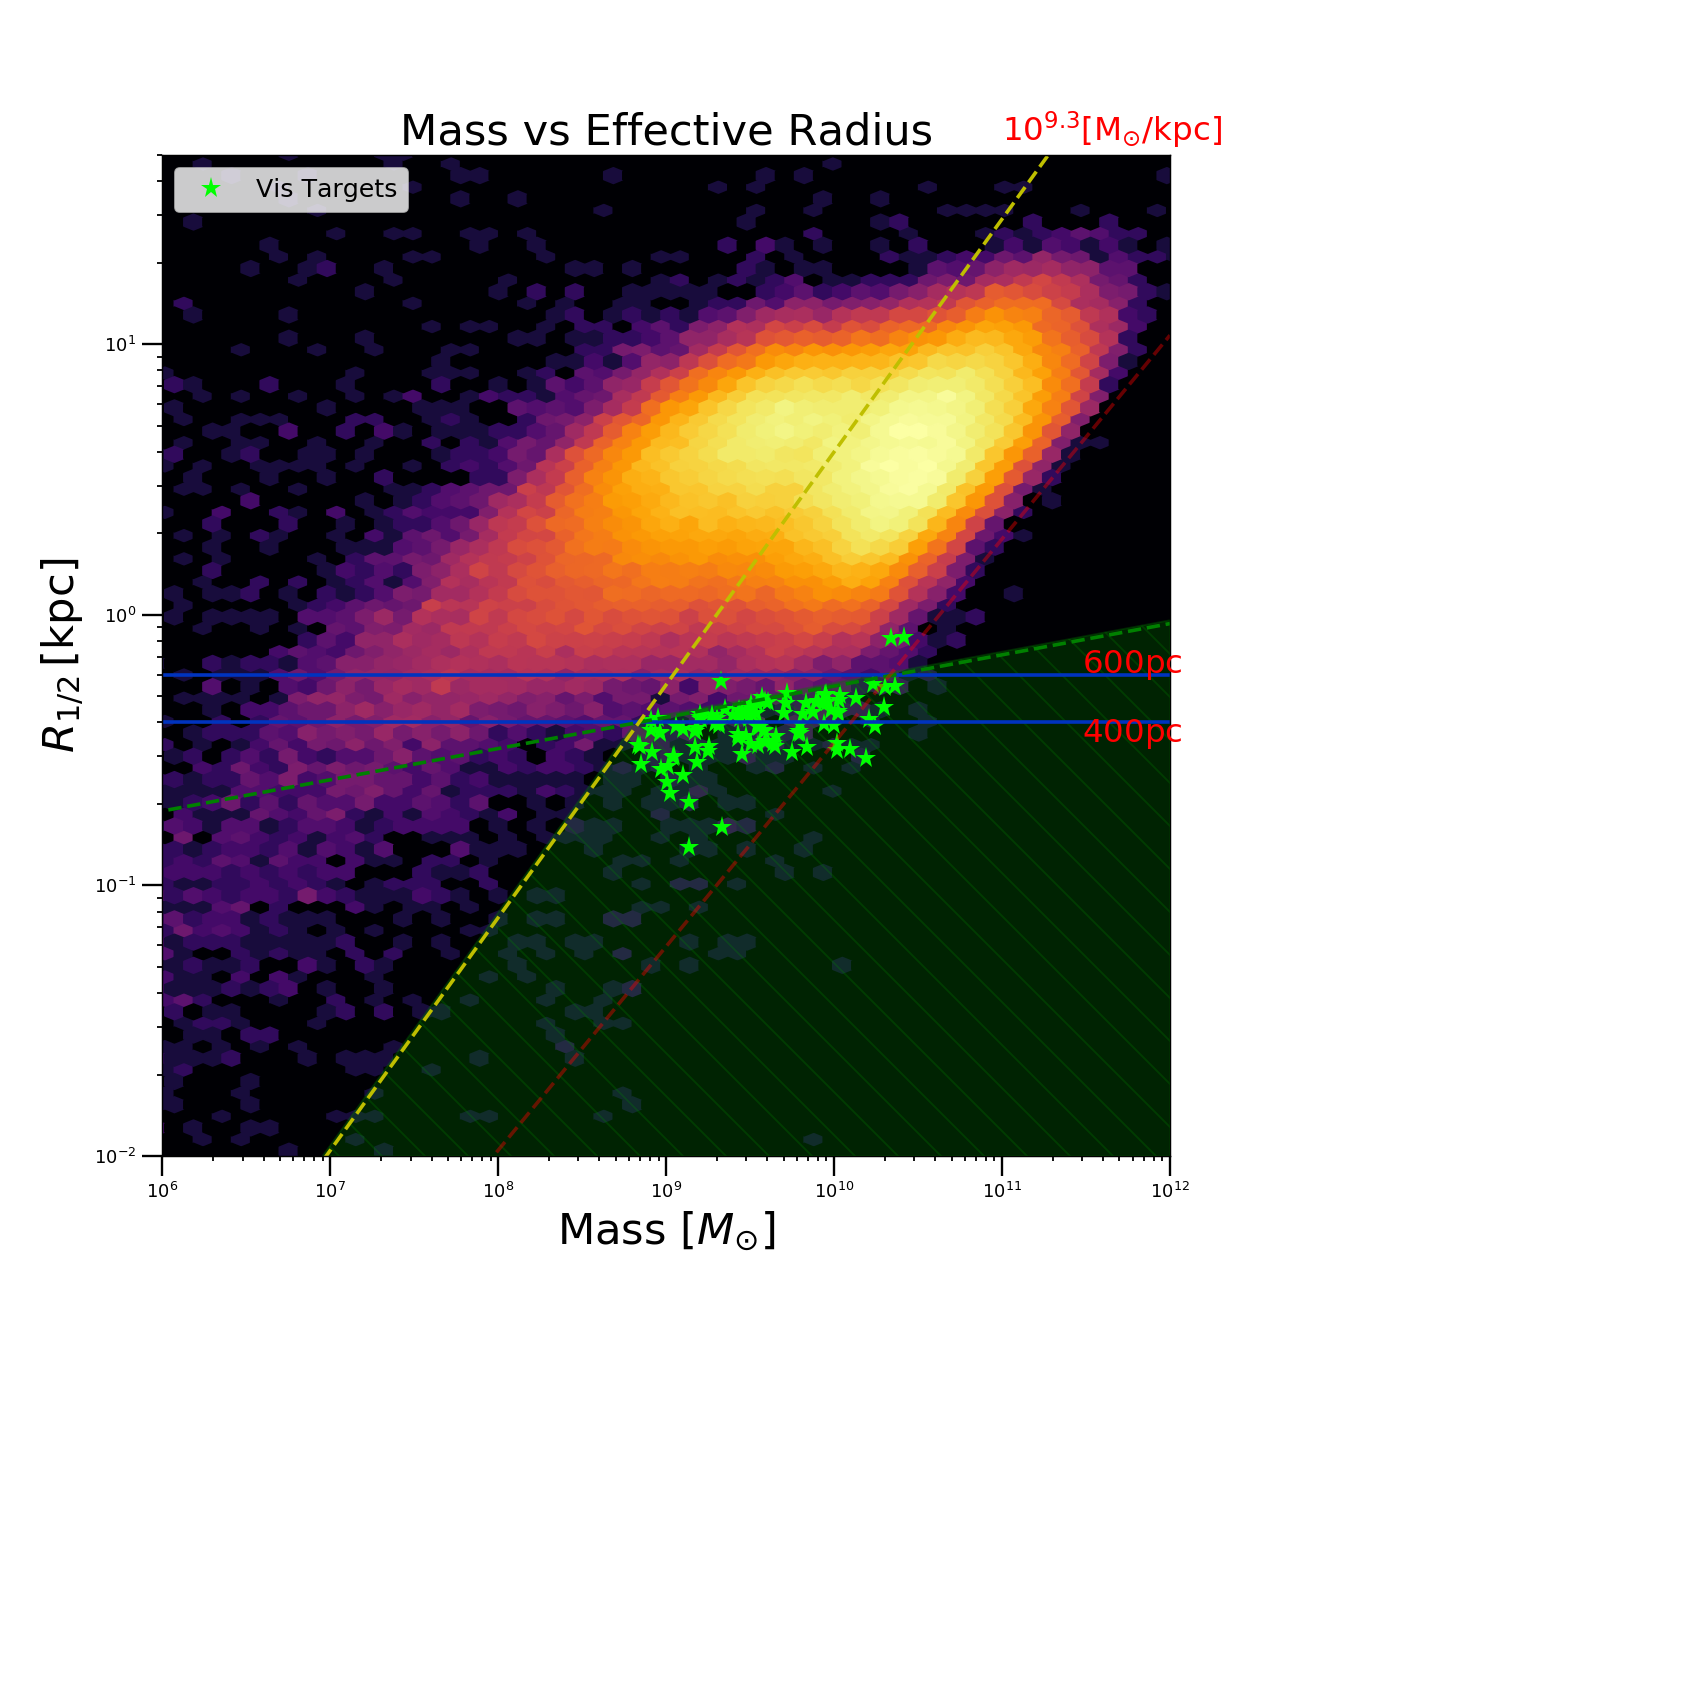

In [14]:
fig1 = figure(figsize=(10,10))
hexbin((10**GranadaFSPS_mass_Set_1), effective50_radius_Set_1, gridsize=100,yscale='log',xscale='log',bins='log', cmap='inferno')
#loglog((10**GranadaFSPS_mass_Set_1[Norris_CrossID]), effective50_radius_Set_1[Norris_CrossID],'.',ms=10,color=[.75,0,0],mec='None',label='Norris literature')
#loglog((10**GranadaFSPS_mass_Set_1[Chillingarian_CrossID]), effective50_radius_Set_1[Chillingarian_CrossID],'v',ms=8,color='blue',mew=2,mec='orange',label='chillingarian')
#loglog((10**GranadaFSPS_mass_Set_1[Reines_CrossID]), effective50_radius_Set_1[Reines_CrossID],'^',ms=8,color='magenta',mew=2,mec='green',label='reines')
loglog((10**GranadaFSPS_mass_Set_1[targets_CrossID]), effective50_radius_Set_1[targets_CrossID],'*',ms=12,color=[0,1,0],mec='None',label='Vis Targets')

text(10**(11),10**(1.75),'$\mathrm{10^{9.3} [M_{\odot}/kpc]}$',color='Red',fontsize=18) 



axhline(y=.6,linewidth=2, color=[0,.2,.75])
text(3e11,.61,'$\mathrm{600 pc}$',color='Red',fontsize=18) 
axhline(y=.4,linewidth=2, color=[0,.2,.75])
text(3e11,.34,'$\mathrm{400 pc}$',color='Red',fontsize=18)
xlim(1e6,1e12) 
ylim(1e-2,5e1) 
xlabel('Mass [$M_{\odot}$]',fontsize=24) 
ylabel('$R_{1/2} \, \mathrm{[kpc]}$',fontsize=24) 
tick_params('both', length=11, width=1.3, which='major') 
tick_params('both', length=3, width=1.0, which='minor') 
#text(5e9,8,'$\mathrm{gE/S0s}$',color='#888888',fontsize=24) 
# text(1.5e5,0.9,'$\mathrm{dSphs}$',color='#888888',fontsize=24) 
# text(5e8,0.08,'$\mathrm{cEs}$',color='#888888',fontsize=24) 
# text(1.3e7,0.01,'$\mathrm{UCDs}$',color='#888888',fontsize=24) 
# text(3e8,3.5,'$\mathrm{dE/S0s}$',color='#888888',fontsize=24) 
# text(2e7,4.5,'$\mathrm{(UDGs)}$',color='#888888',fontsize=24) 
# text(6e6,0.003,'$\mathrm{GCs}$',color='#888888',fontsize=24) 
loglog(mass_axis,radius_axis3,'g--',linewidth=2) 
plt.fill([6.7108e8,1e12,1e12,8.97896e6,6.7108e8],[0.409,0.95439,1e-2,1e-2,0.409],color='green',hatch='\\', alpha=.28)
loglog(mass_axis,radius_axis2,'y--',linewidth=2) 
loglog(mass_axis,radius_axis,'r--',linewidth=2,alpha=.4) 
title('Mass vs Effective Radius',fontsize=24)
legend(loc='upper left',numpoints=1,fontsize=14) 
savefig('size vs lum fig.png')

<IPython.core.display.Javascript object>


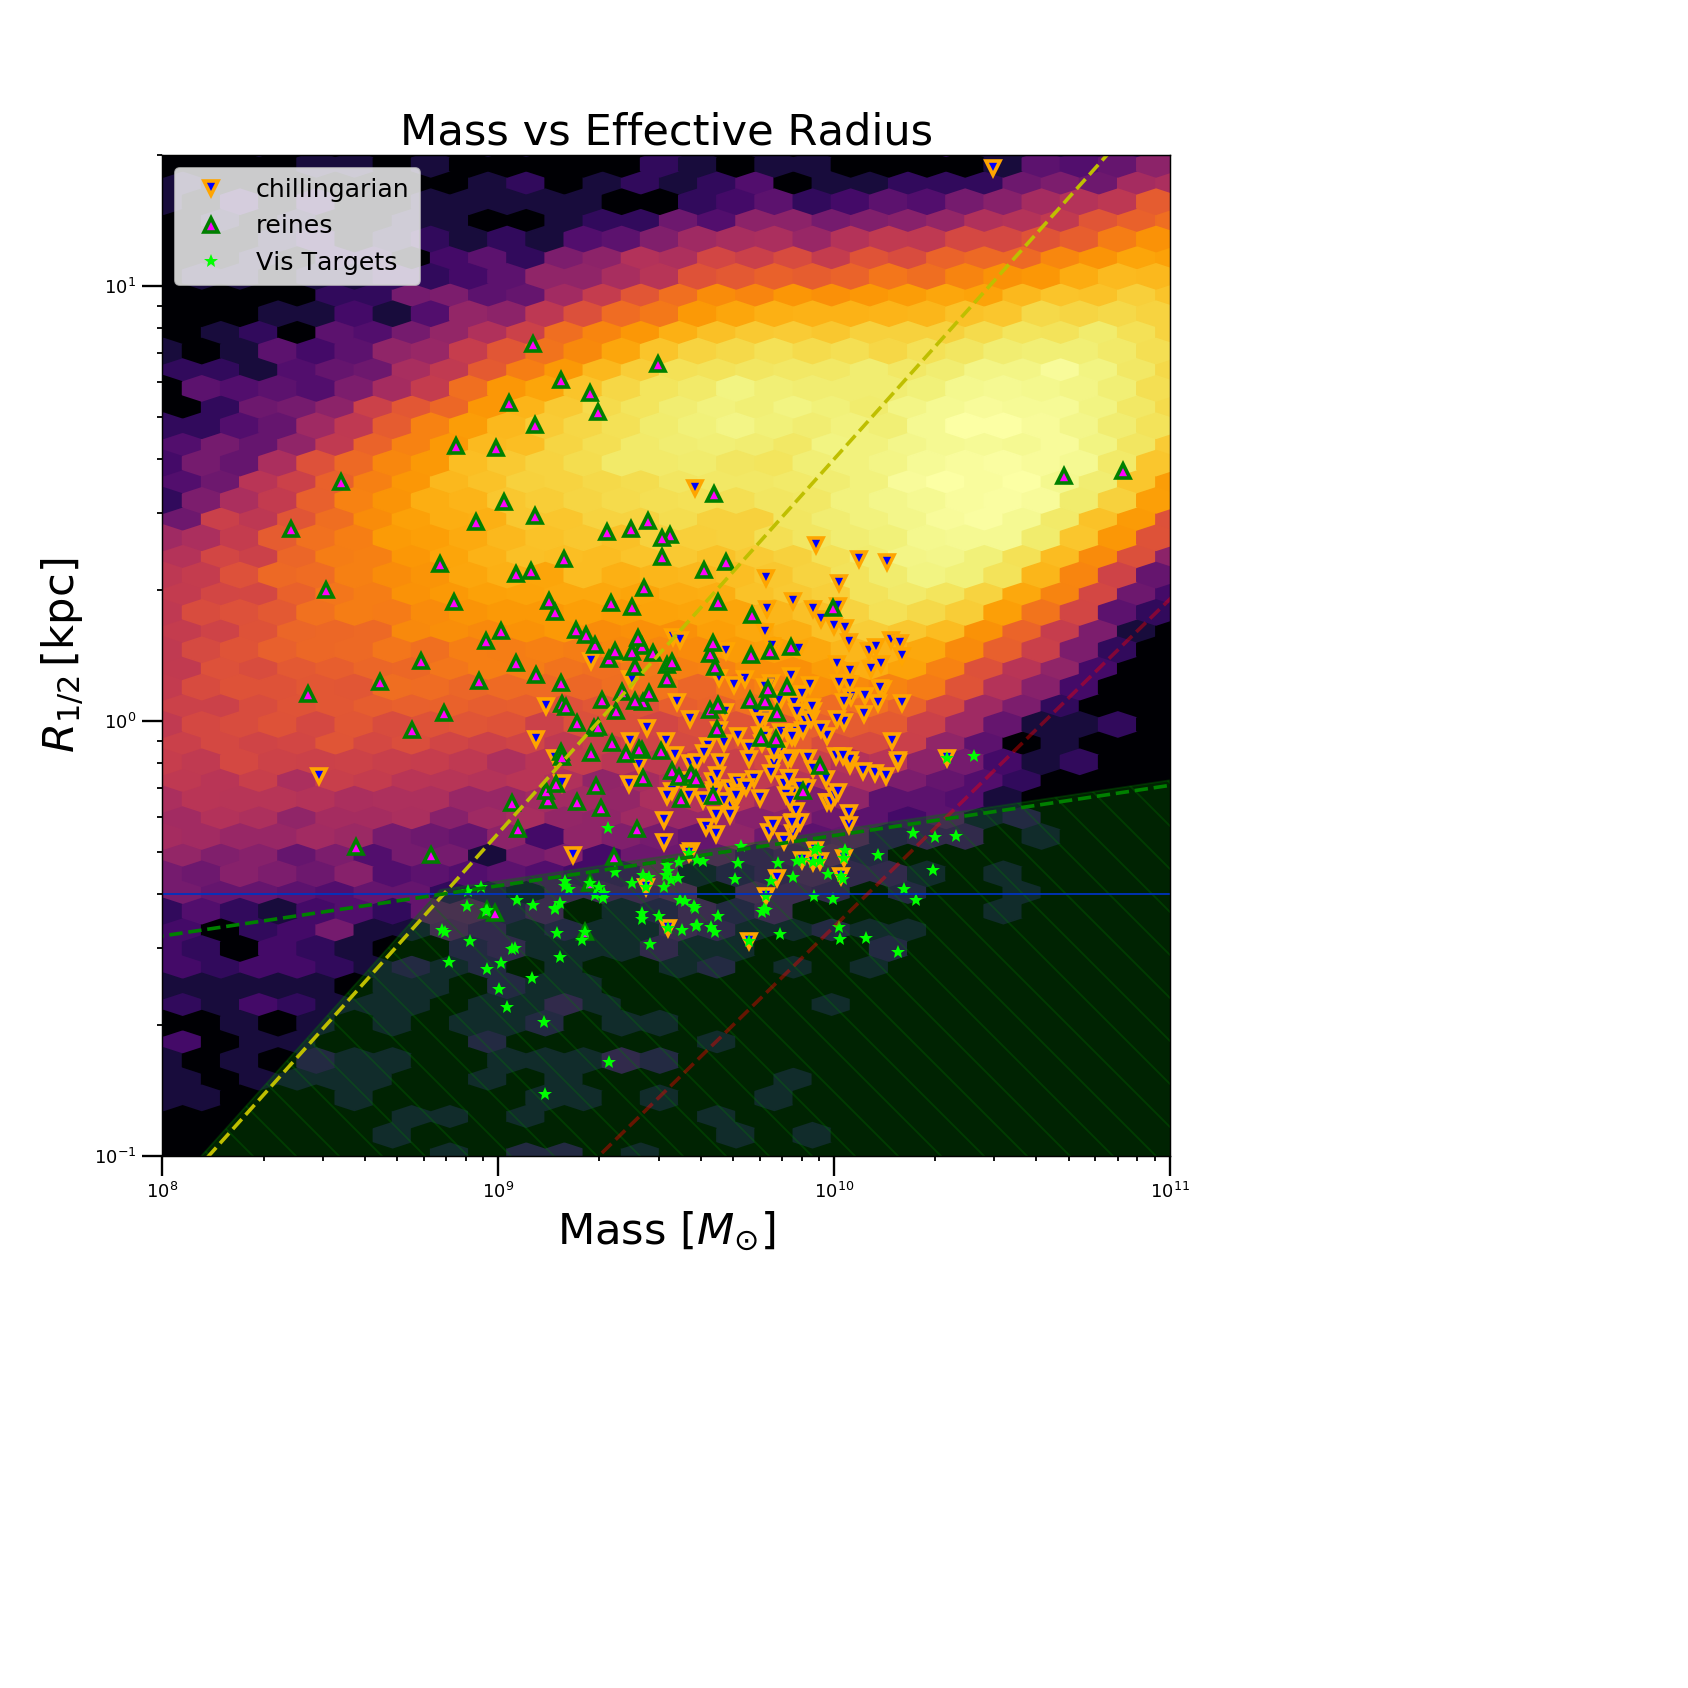

In [12]:
fig1, ax = plt.subplots(figsize=(10,10))
xmin = 1e8
xmax = 1e11
ymin = 1e-1
ymax = 2e1

ax.hexbin((10**GranadaFSPS_mass_Set_1), effective50_radius_Set_1, gridsize=100,yscale='log',xscale='log',bins='log', cmap='inferno')
loglog((10**GranadaFSPS_mass_Set_1[Chillingarian_CrossID]), effective50_radius_Set_1[Chillingarian_CrossID],'v',ms=8,color='blue',mew=2,mec='orange',label='chillingarian')
loglog((10**GranadaFSPS_mass_Set_1[Reines_CrossID]), effective50_radius_Set_1[Reines_CrossID],'^',ms=8,color='magenta',mew=2,mec='green',label='reines')
ax.loglog((10**GranadaFSPS_mass_Set_1[targets_CrossID]), effective50_radius_Set_1[targets_CrossID],'*',ms=8,color=[0,1,0],mec='None',label='Vis Targets')
postplot(xmin, xmax, ymin, ymax,"Mass vs Effective Radius")
ax.loglog(mass_axis,radius_axis,'r--',linewidth=2,alpha=.4) 
ax.loglog(mass_axis,radius_axis2,'y--',linewidth=2) 
ax.loglog(mass_axis,radius_axis3,'g--',linewidth=2) 
plt.fill([6.7108e8,1e12,1e12,8.97896e6,6.7108e8],[0.409,0.95439,1e-2,1e-2,0.409],color='green',hatch='\\', alpha=.28)
plt.show()
#fig1.savefig('Mass vs Effective Radius reins chill .png')



In [7]:
#Selection parameters

In [7]:
small = effective50_radius_Set_1 <= .02
large = effective50_radius_Set_1 >= .4
medium = small + large == 0
asd= effective50_radius_Set_1 <= .1
galtype = objtype == 3

dense = 10**(GranadaFSPS_mass_Set_1)/effective50_radius_Set_1 >= 10**(9.3)

aac = snMedian_Set_1 >= 10

<IPython.core.display.Javascript object>


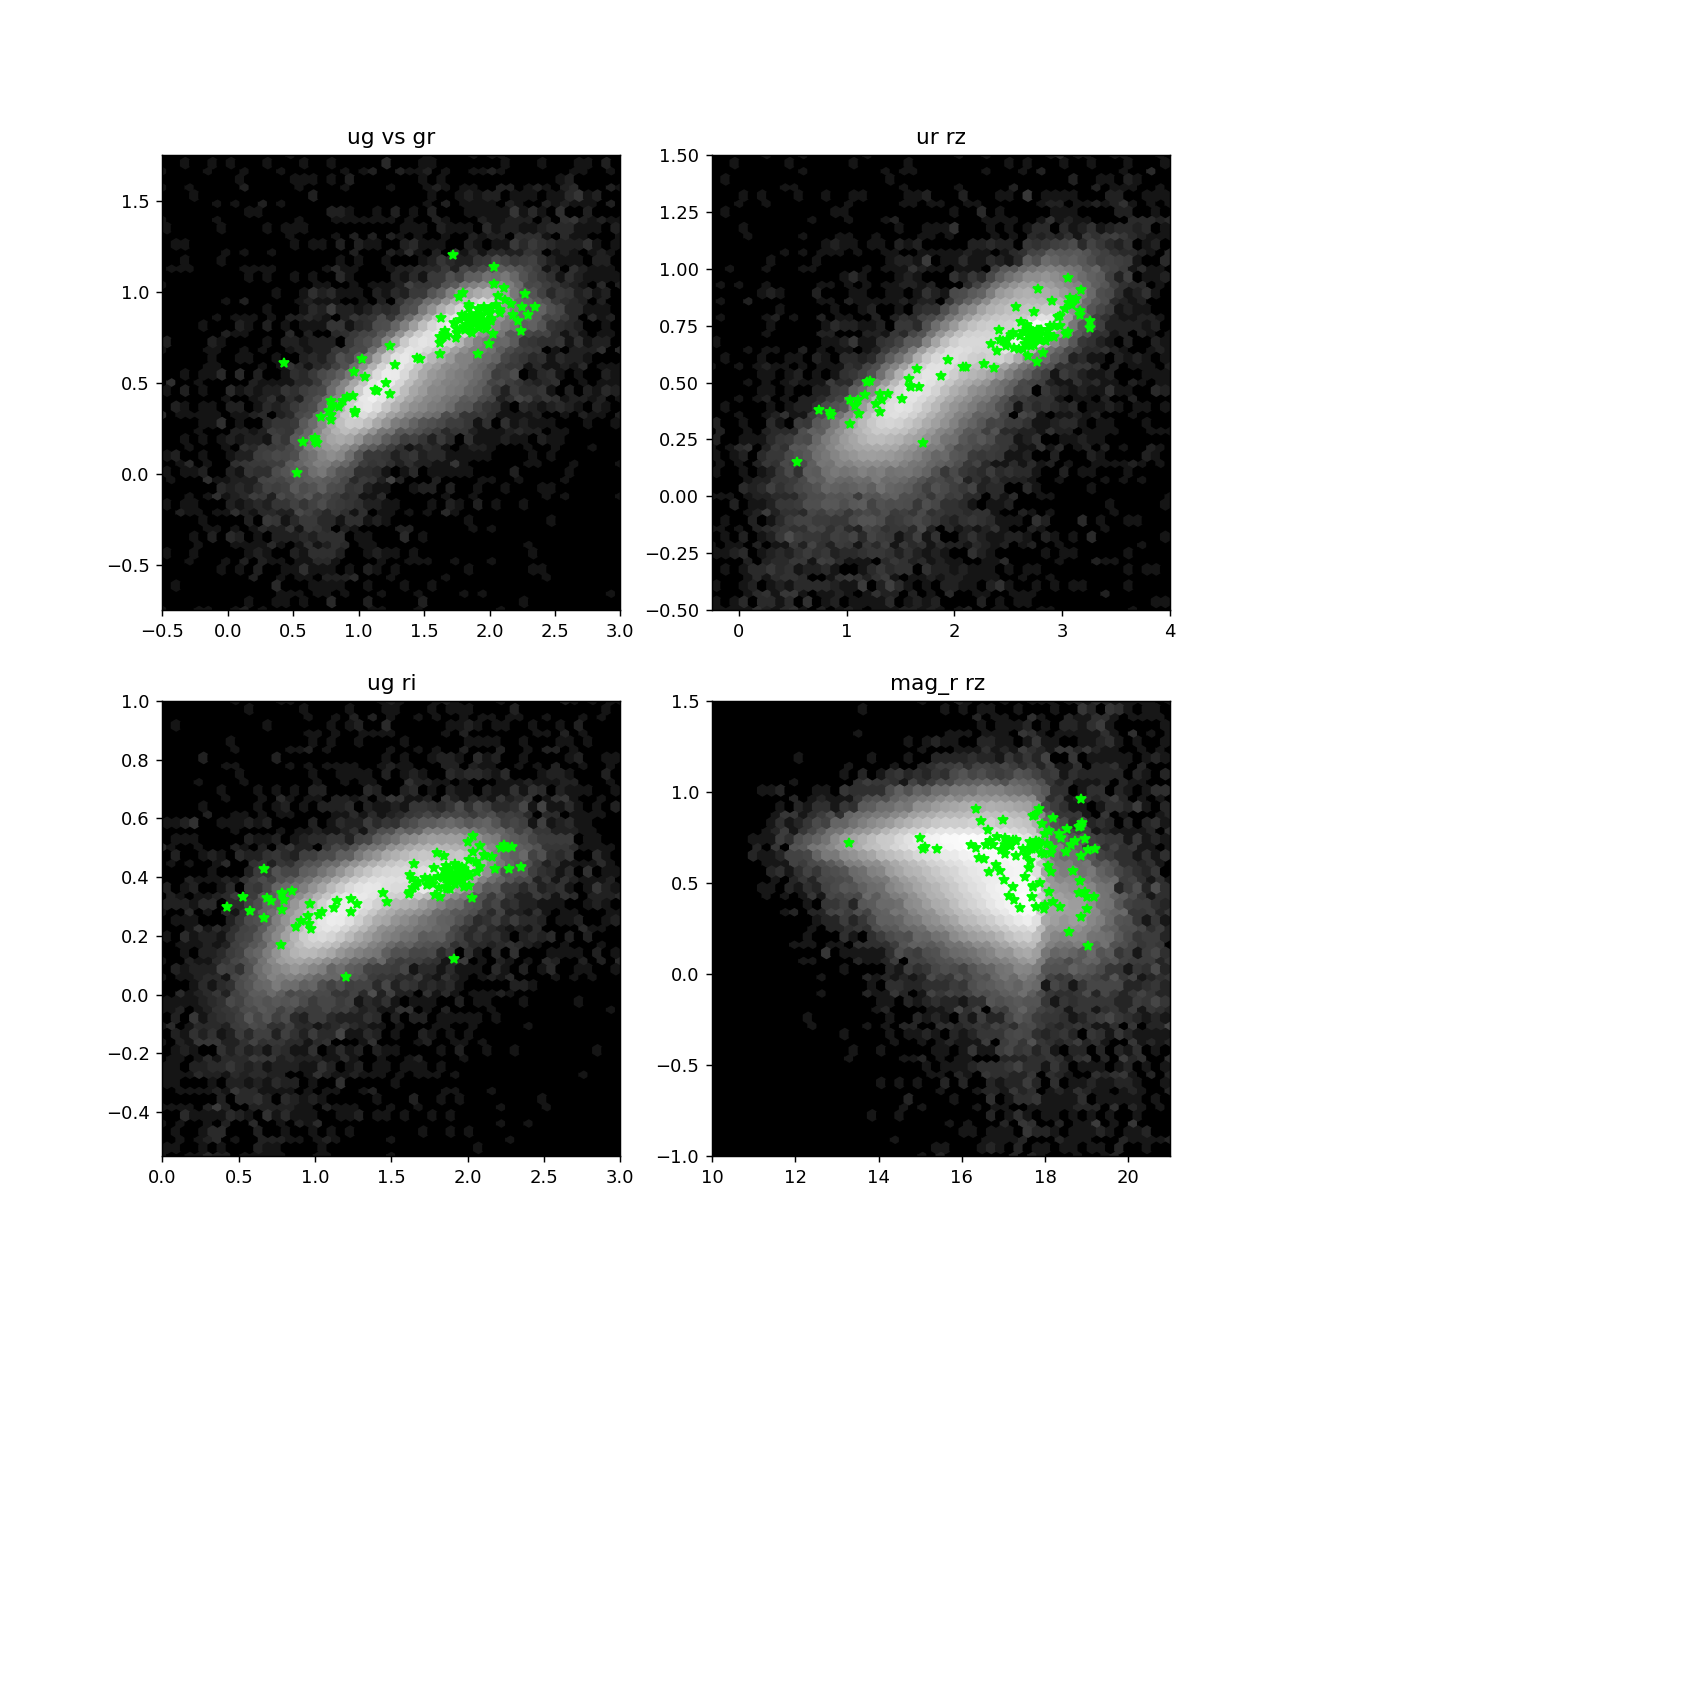

In [8]:

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.flatten()
xmin = -10**(1.3010299956639813)
xmax = 10**(1.3010299956639813)
ymin = -10**(1.3010299956639813)
ymax = 10**(1.3010299956639813)
gridsize = 50

ax0.hexbin(u_g_Set_1,g_r_Set_1,cmap='gist_gray',bins='log', extent=(-.5,3,-.75,1.75),gridsize=50 )
ax0.plot(u_g_Set_1[targets_CrossID],g_r_Set_1[targets_CrossID], '*',color=[0,1,0])
ax0.axis([-.5,3,-.75,1.75])
ax0.set_title('ug vs gr')


ax1.hexbin(u_r_Set_1,r_z_Set_1,cmap='gist_gray',bins='log', extent=(-.25,4,-.5,1.5),gridsize=50 )
ax1.plot(u_r_Set_1[targets_CrossID],r_z_Set_1[targets_CrossID], '*',color=[0,1,0])
ax1.axis([-.25,4,-.5,1.5])
ax1.set_title('ur rz')


ax2.hexbin(u_g_Set_1,r_i_Set_1,cmap='gist_gray',bins='log', extent=(0, 3, -.55, 1),gridsize=50 )
ax2.plot(u_g_Set_1[targets_CrossID],r_i_Set_1[targets_CrossID], '*',color=[0,1,0])
ax2.axis([0, 3, -.55, 1])

ax2.set_title('ug ri')


ax3.hexbin(modelmag_r_Set_1,r_z_Set_1,cmap='gist_gray',bins='log', extent=(10,21,-1,1.5),gridsize=50 )
ax3.plot(modelmag_r_Set_1[targets_CrossID],r_z_Set_1[targets_CrossID], '*',color=[0,1,0])
ax3.axis([10,21,-1,1.5])

ax3.set_title('mag_r rz ')



C:\Users\T3st\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


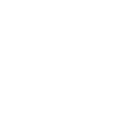

In [10]:
def generate_data(n):
    """Make random, correlated x & y arrays"""
    points = np.random.multivariate_normal(mean=(0,0),
        cov=[[0.4,9],[9,10]],size=int(n))
    return points

if __name__ =='__main__':

    color_map = plt.cm.Spectral_r
    n = 1e4
    points = generate_data(n)

    extent = [6,12,-2,2]

    fig=plt.figure(figsize=(1,1))
    ax = fig.add_subplot(111)
    x, y = 10**GranadaFSPS_mass_Set_1,effective50_radius_Set_1
    # Set gridsize just to make them visually large
    image = hexbin(x,y,cmap=color_map,gridsize=75,extent=extent,mincnt=0,bins='log',yscale='log',xscale='log')
    # Note that mincnt=1 adds 1 to each count
    counts=image.get_array() #counts in each hexagon, works great
    ncnts = np.count_nonzero(np.power(10,counts))
    verts = image.get_offsets()
    b=image.get_paths()   #this does work, gives Path([[]][]) which can be plotted
    length = []
    height = []
    for x in xrange(len(b)):
        xav=np.mean(b[x].vertices[0:6,0]) #center in x (RA)
        yav=np.mean(b[x].vertices[0:6,1]) #center in y (DEC)
        length.append(xav)
        height.append(yav)
        plot(xav,yav,'k.',zorder=100)
#     ax.set_xlim(1e6,1e12)
#     ax.set_ylim(1e-2,5e1)
#     plt.grid(True)
#     cb = plt.colorbar(image,spacing='uniform',extend='max')
#     plt.show()
close()

<IPython.core.display.Javascript object>


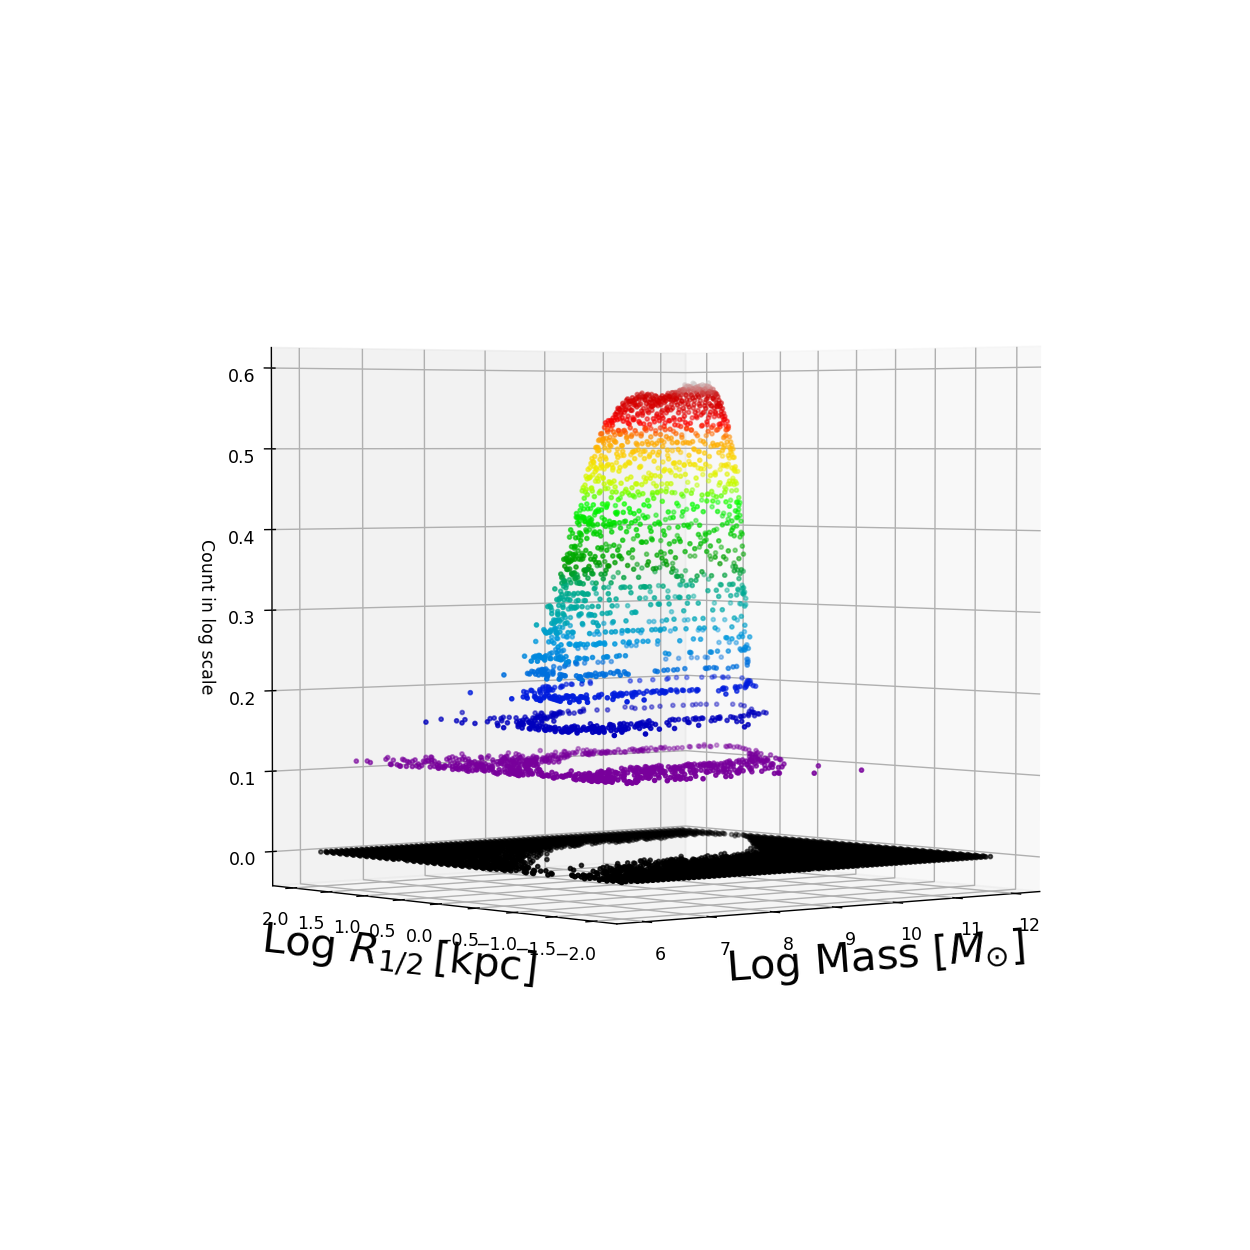

Text(0.5,0,u'Count in log scale')

In [27]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(log10(length), log10(height), log10(counts+1), c=counts, marker='.',cmap='nipy_spectral')

ax.set_xlabel(' Log Mass [$M_{\odot}$]',fontsize=24) 
ax.set_ylabel('Log $R_{1/2} \, \mathrm{[kpc]}$',fontsize=24) 
ax.set_zlabel('Count in log scale')


<IPython.core.display.Javascript object>


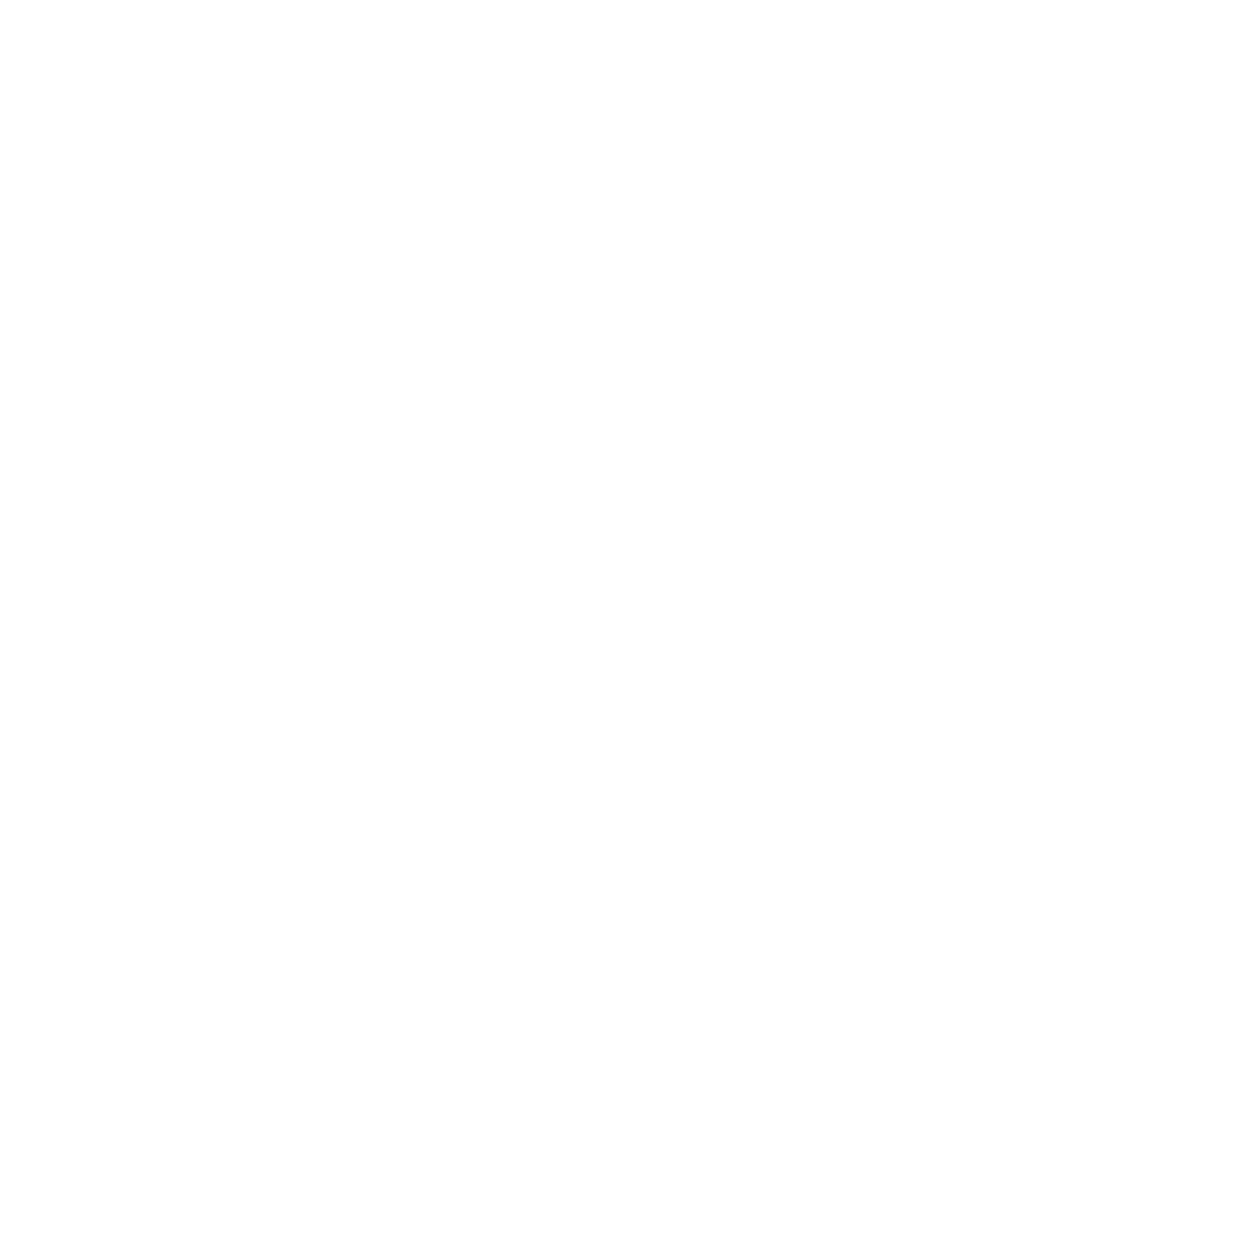

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".


ax.plot_trisurf(log10(length), log10(height), counts, linewidth=0.2,cmap=cm.nipy_spectral, antialiased=True)

<IPython.core.display.Javascript object>


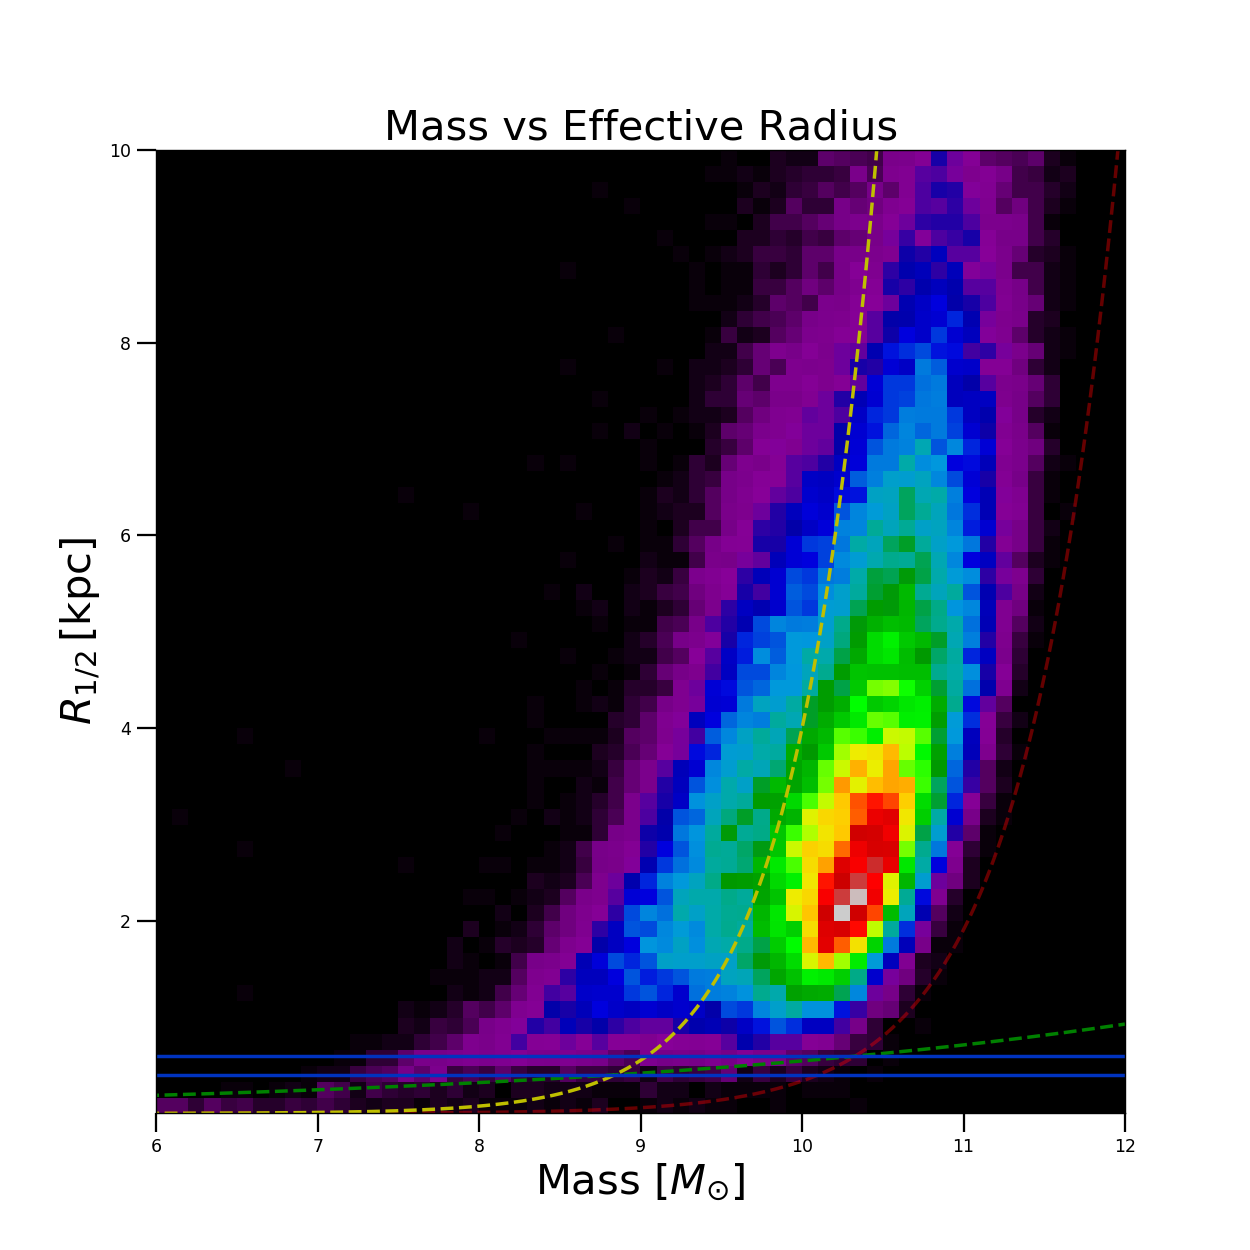

In [11]:
fig1 = figure(figsize=(10,10))
hist2d(GranadaFSPS_mass_Set_1[aac], effective50_radius_Set_1[aac], range=[[6,12], [1e-3,1e1]],bins=60,cmap='nipy_spectral',normed=True)

#hist2d(GranadaFSPS_mass_Set_1[rikola], effective50_radius_Set_1[rikola], range=[[6,12], [1e-3,1e1]],bins=40,cmin=2, alpha=1)
# plot((GranadaFSPS_mass_Set_1[targets_CrossID]), pR50[targets_CrossID],'*',ms=12,color=[0,1,0],mec='None',label='Vis Targets')
# plot(GranadaFSPS_mass_Set_1[pricecE], pR50[pricecE],'*',ms=32,color=[.75,.0,.0],mec='None',label='pricecE')
# plot(GranadaFSPS_mass_Set_1[dwarf_agn], pR50[dwarf_agn],'.',ms=32,color=[.95,0,.75],mec='None',label='dwarf_agn')
# plot(8.5563025007672877,10**(-1.6),'*',ms=15,color=[0,1,1],mec='None',label='most massive UCD in virgo')

plot(log10(mass_axis),radius_axis,'r--',linewidth=2,alpha=.4) 
plot(log10(mass_axis),radius_axis2,'y--',linewidth=2) 
plot(log10(mass_axis),radius_axis3,'g--',linewidth=2) 

axhline(y=.6,linewidth=2, color=[0,.2,.75])
text(3e11,.61,'$\mathrm{600 pc}$',color='Red',fontsize=18) 
axhline(y=.4,linewidth=2, color=[0,.2,.75])
text(3e11,.34,'$\mathrm{400 pc}$',color='Red',fontsize=18)
xlim(6,12) 
ylim(1e-2,10) 
xlabel('Mass [$M_{\odot}$]',fontsize=24) 
ylabel('$R_{1/2} \, \mathrm{[kpc]}$',fontsize=24) 
tick_params('both', length=11, width=1.3, which='major') 
tick_params('both', length=3, width=1.0, which='minor') 
#text(5e9,8,'$\mathrm{gE/S0s}$',color='#888888',fontsize=24) 
# text(1.5e5,0.9,'$\mathrm{dSphs}$',color='#888888',fontsize=24) 
# text(5e8,0.08,'$\mathrm{cEs}$',color='#888888',fontsize=24) 
# text(1.3e7,0.01,'$\mathrm{UCDs}$',color='#888888',fontsize=24) 
# text(3e8,3.5,'$\mathrm{dE/S0s}$',color='#888888',fontsize=24) 
# text(2e7,4.5,'$\mathrm{(UDGs)}$',color='#888888',fontsize=24) 
# text(6e6,0.003,'$\mathrm{GCs}$',color='#888888',fontsize=24) 
title('Mass vs Effective Radius',fontsize=24)
legend(loc='upper left',numpoints=1,fontsize=14) 
#savefig('size vs lum fig.png')

<IPython.core.display.Javascript object>


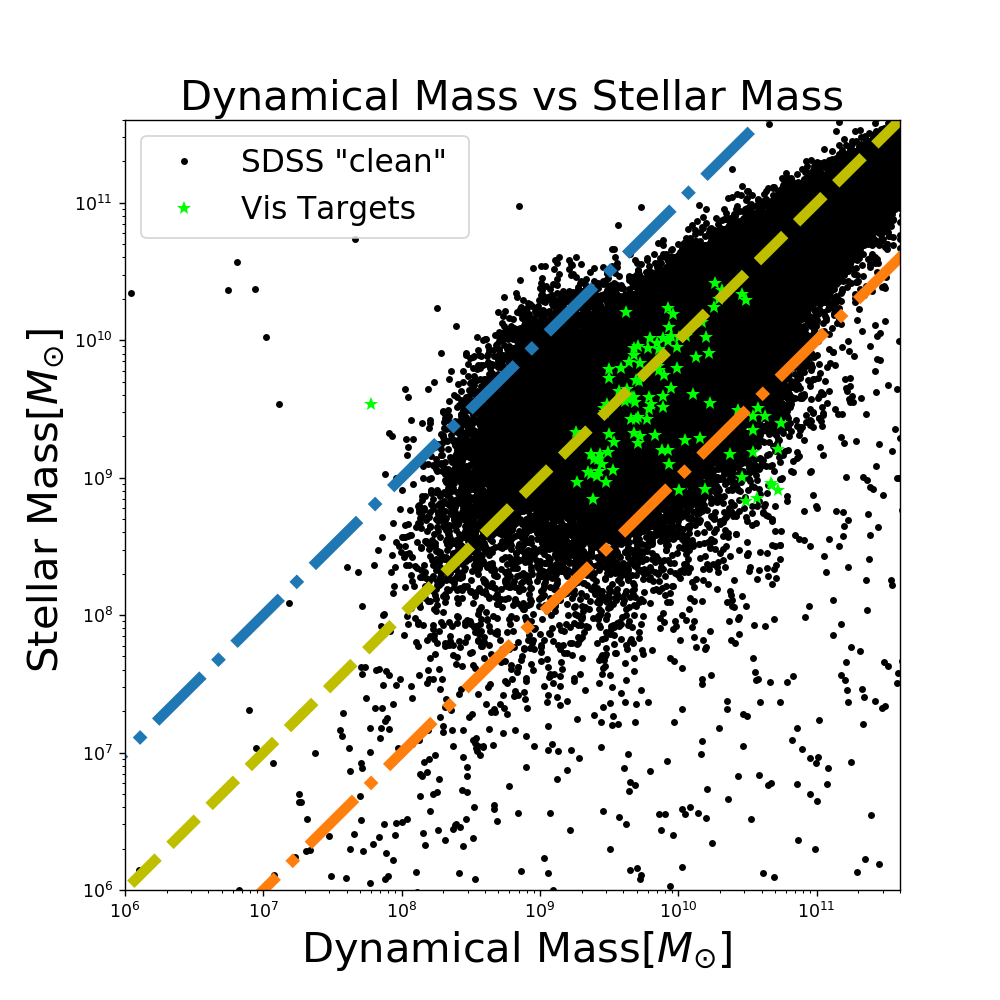

In [12]:

fig2 = figure(figsize=(8,8))
loglog((4*(( veldisp_Set_1[aac]**2)*(effective50_radius_Set_1[aac]))/(4.3e-6)),(10**GranadaFSPS_mass_Set_1[aac]),'.',ms=8,color=[0,0,0],mec='None',label='SDSS "clean" ')
loglog((4*(( vdisp_median1_Set_1[targets_CrossID]**2)*(effective50_radius_Set_1[targets_CrossID]))/(4.3e-6)),(10**GranadaFSPS_mass_Set_1[targets_CrossID]),'*',ms=8,color=[0,1,0],mec='None',label='Vis Targets')
plot((1e2,1e16),(1e2,1e16),'y--',lw=6) 
plot((1e2,1e16),(1e2*10,1e16*10),'p-.',lw=6) 
plot((1e2,1e16),(1e2/10,1e16/10),'p-.',lw=6) 
xlim(1e6,4e11)  
ylim(1e6,4e11) 
title('Dynamical Mass vs Stellar Mass',fontsize=24)
xlabel(' Dynamical Mass[$M_{\odot}$] ',fontsize=24) 
ylabel(' Stellar Mass[$M_{\odot}$] ',fontsize=24) 
legend(loc='best',numpoints=1,fontsize=18) 

<IPython.core.display.Javascript object>


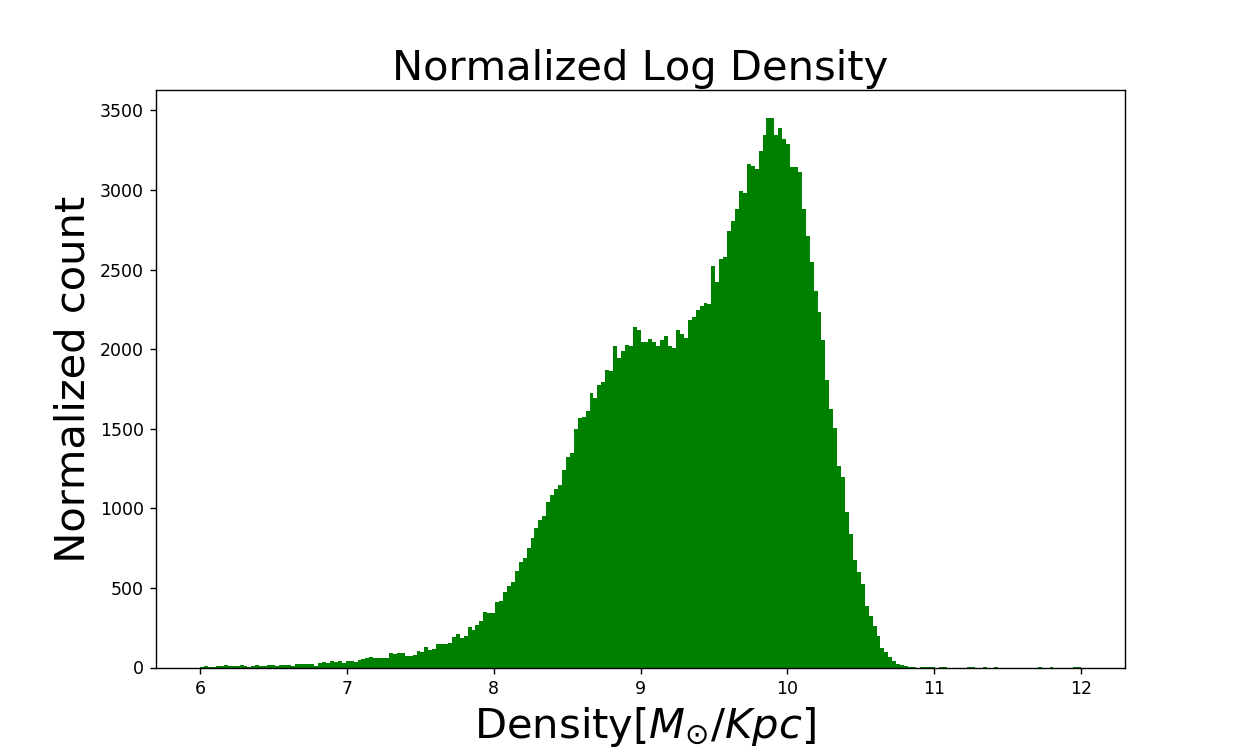

Text(0,0.5,u' Normalized count ')

In [20]:
fig1, ax = plt.subplots(figsize=(10,6))
hist(log10(density), bins = np.linspace(6.0, 12.0,225), facecolor='green')
title('Normalized Log Density',fontsize=24)
xlabel(' Density[$M_{\odot}/Kpc$] ',fontsize=24) 
ylabel(' Normalized count ',fontsize=24) 


In [22]:
dens_check = log10(density)>10.8

In [23]:
#ac.writer(objid_Set_1[dens_check],ra_Set_1[dens_check],dec_Set_1[dens_check])


Choose a file name density check


<function astrocalcs.writer>

184.226654575 39.6319837343
